In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
data_df = pd.read_csv('/content/churn (2).csv')
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())


dataoveriew(data_df, 'Data Overview')

Data Overview:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


<Axes: >

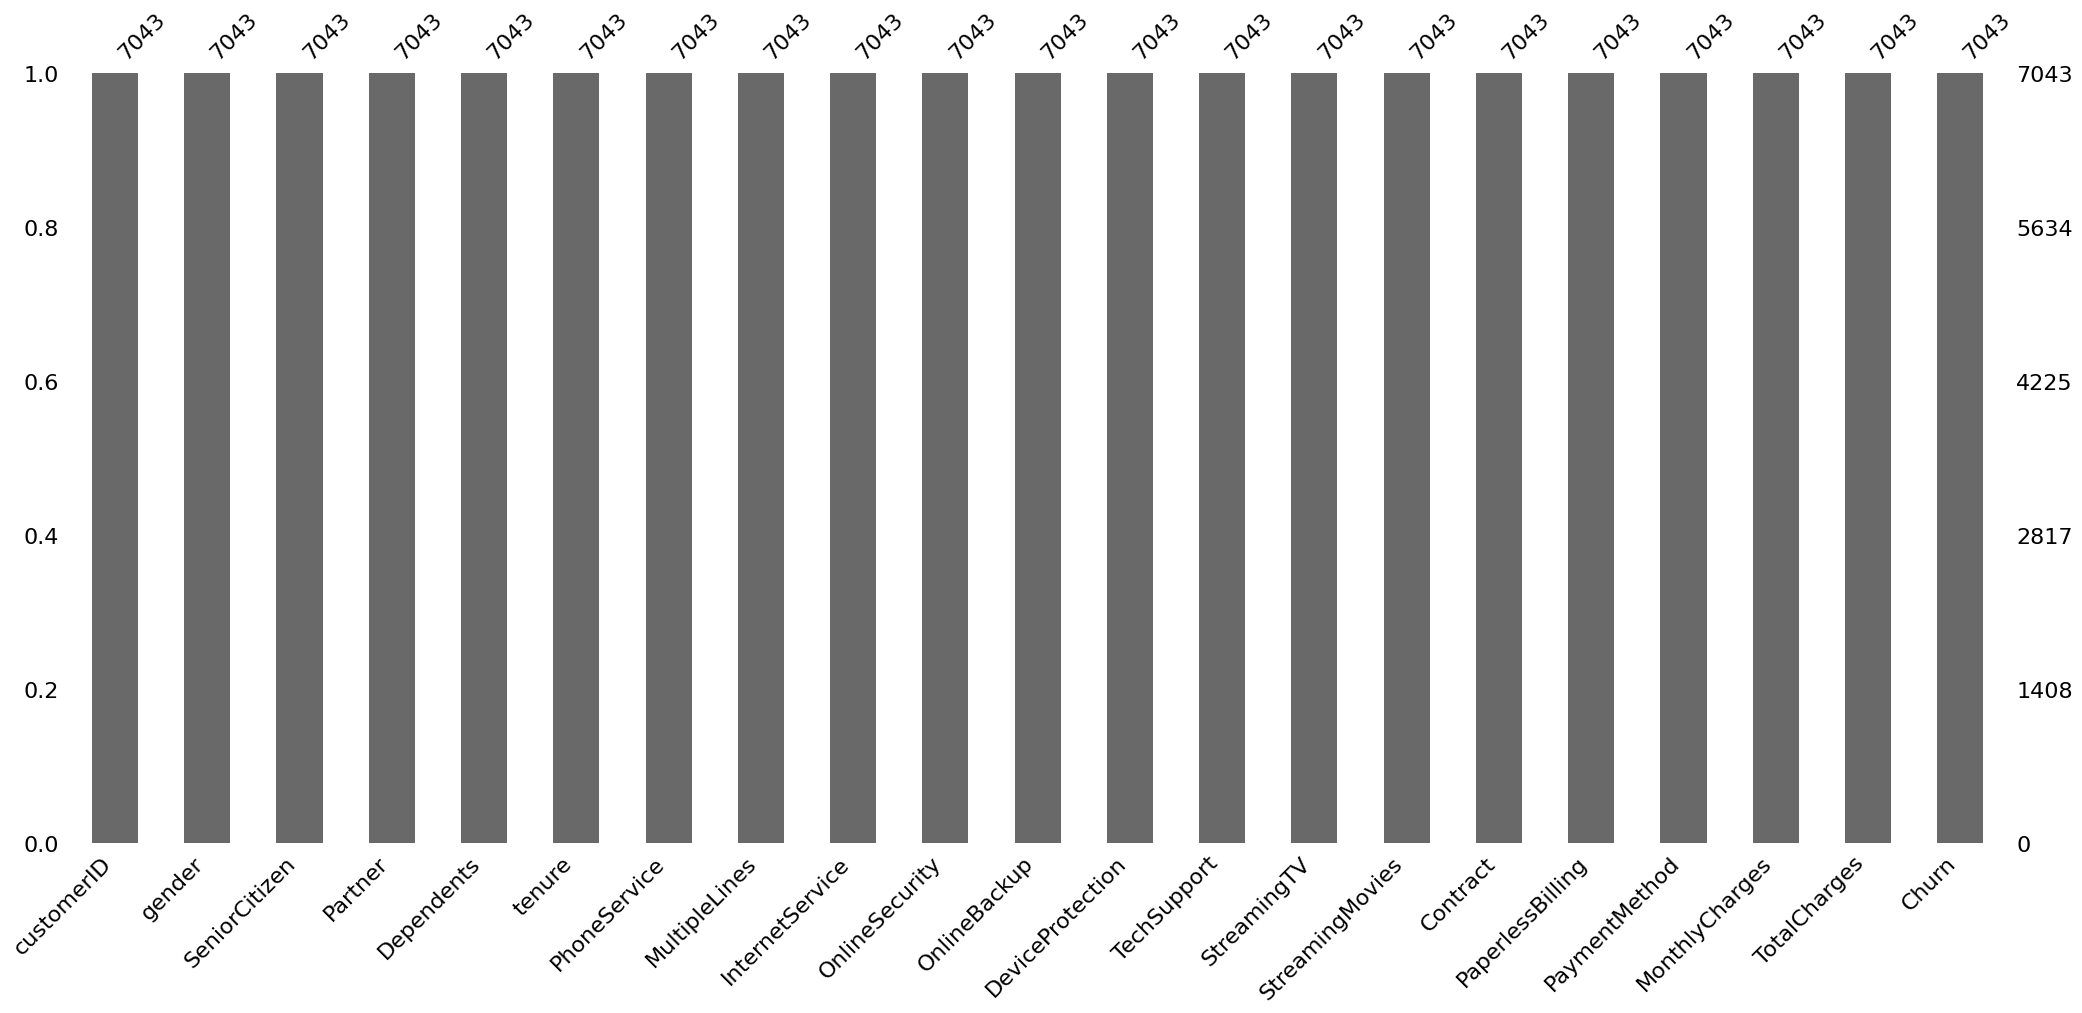

In [ ]:
import missingno as msno
msno.bar(data_df)

In [ ]:
data_df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [ ]:
def bar(feature, df=data_df ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()

In [ ]:
import plotly.express as px

def pie(feature, df=data_df):
    # Group by the categorical feature and churn status
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0: 'Count'})

    # Calculate the value counts of each distribution and their corresponding percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100, 1) for element in div_list]

    # Define string formatting for graph annotation
    def num_format(list_instance):
        formatted_str = ''
        for index, num in enumerate(list_instance):
            if index < len(list_instance) - 2:
                formatted_str = formatted_str + f'{num}%, '
            elif index == len(list_instance) - 2:
                formatted_str = formatted_str + f'{num}% & '
            else:
                formatted_str = formatted_str + f'{num}%'
        return formatted_str

    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance) - 2:
                formatted_str = formatted_str + f'{cat}, '
            elif index == len(list_instance) - 2:
                formatted_str = formatted_str + f'{cat} & '
            else:
                formatted_str = formatted_str + f'{cat}'
        return formatted_str

    # Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    # Prepare data for pie chart
    pie_data = temp_df.groupby(feature).sum().reset_index()

    # Create the pie chart
    fig = px.pie(pie_data, names=feature, values='Count', title=f'Churn rate by {feature}', color_discrete_sequence=px.colors.sequential.RdBu)
    fig.add_annotation(
        text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
        align='left',
        showarrow=False,
        xref='paper',
        yref='paper',
        x=1.2,
        y=1.2,
        bordercolor='black',
        borderwidth=1
    )
    fig.update_layout(
        # Margin space for the annotations on the right
        margin=dict(r=300),
    )

    return fig.show()


In [ ]:
pie('gender')
#SeniorCitizen feature plot
data_df.loc[data_df.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
data_df.loc[data_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #convert 1 to Yes in all data instances
pie('SeniorCitizen')
#Partner feature plot
pie('Partner')
#Dependents feature plot
pie('Dependents')

In [ ]:
pie('PhoneService')
pie('MultipleLines')
pie('InternetService')
pie('OnlineSecurity')
pie('OnlineBackup')
pie('DeviceProtection')
pie('TechSupport')
pie('StreamingTV')
pie('StreamingMovies')

In [ ]:
pie('Contract')
pie('PaperlessBilling')
pie('PaymentMethod')

In [ ]:
data_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
try:
    data_df['TotalCharges'] = data_df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ' '


In [ ]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors='coerce')
#Fill the missing values with with the median value
data_df['TotalCharges'] = data_df['TotalCharges'].fillna(data_df['TotalCharges'].median())

In [ ]:
def hist(feature):
    group_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

In [ ]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

In [ ]:
data_df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [ ]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'], errors='coerce')

# Drop rows with NaN values in the columns being binned
data_df = data_df.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges'])

# Create a new DataFrame for binning
bin_df = pd.DataFrame()

# Update the binning DataFrame
bin_df['tenure_bins'] = pd.qcut(data_df['tenure'], q=3, labels=['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] = pd.qcut(data_df['MonthlyCharges'], q=3, labels=['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] = pd.qcut(data_df['TotalCharges'], q=3, labels=['low', 'medium', 'high'])
bin_df['Churn'] = data_df['Churn']
bar('tenure_bins', bin_df)
bar('MonthlyCharges_bins', bin_df)
bar('TotalCharges_bins', bin_df)

In [ ]:
data_df.drop(["customerID"],axis=1,inplace = True)

# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
data_df['Churn'] = data_df[['Churn']].apply(binary_map)

# Encoding gender category
data_df['gender'] = data_df['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
data_df[binary_list] = data_df[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
data_df = pd.get_dummies(data_df, drop_first=True)

In [ ]:
corr = data_df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]

#Effect the change to the dataframe column names
data_df.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Wed, 03 Jul 2024   Deviance:                       5829.3
Time:                        22:36:11   Pearson chi2:                 8.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2807
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [ ]:
np.exp(res.params)

Intercept                                        2.287343
MultipleLines_No_phone_service[T.True]           1.382358
MultipleLines_Yes[T.True]                        1.563475
InternetService_Fiber_optic[T.True]              5.771657
InternetService_No[T.True]                       0.774257
OnlineSecurity_No_internet_service[T.True]       0.774257
OnlineSecurity_Yes[T.True]                       0.814269
OnlineBackup_No_internet_service[T.True]         0.774257
OnlineBackup_Yes[T.True]                         1.026127
DeviceProtection_No_internet_service[T.True]     0.774257
DeviceProtection_Yes[T.True]                     1.159152
TechSupport_No_internet_service[T.True]          0.774257
TechSupport_Yes[T.True]                          0.836193
StreamingTV_No_internet_service[T.True]          0.774257
StreamingTV_Yes[T.True]                          1.806134
StreamingMovies_No_internet_service[T.True]      0.774257
StreamingMovies_Yes[T.True]                      1.829067
Contract_One_y

In [ ]:
data_df['tenure']


0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_df['tenure'] = sc.fit_transform(data_df[['tenure']])
data_df['MonthlyCharges'] = sc.fit_transform(data_df[['MonthlyCharges']])
data_df['TotalCharges'] = sc.fit_transform(data_df[['TotalCharges']])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming X and y are defined from your dataset
X = data_df.drop('Churn', axis=1)
y = data_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

def modeling(alg, alg_name, params={}):
    model = alg(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    def print_scores(alg_name, y_true, y_pred):
        acc_score = accuracy_score(y_true, y_pred)
        pre_score = precision_score(y_true, y_pred)
        f_score = f1_score(y_true, y_pred, average='weighted')

        print(f"{alg_name}")
        print(f"accuracy: {acc_score:.10f}")
        print(f"precision: {pre_score:.10f}")
        print(f"f1_score: {f_score:.10f}")

    print_scores(alg_name, y_test, y_pred)
    return model


model = modeling(GradientBoostingClassifier, "Gradient Boosting Classifier", params=gbm_params)


Gradient Boosting Classifier
accuracy: 0.7998106957
precision: 0.6431623932
f1_score: 0.7939025631


In [ ]:
gm = GradientBoostingClassifier()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=gm, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=GradientBoostingClassifier(), scoring='accuracy')

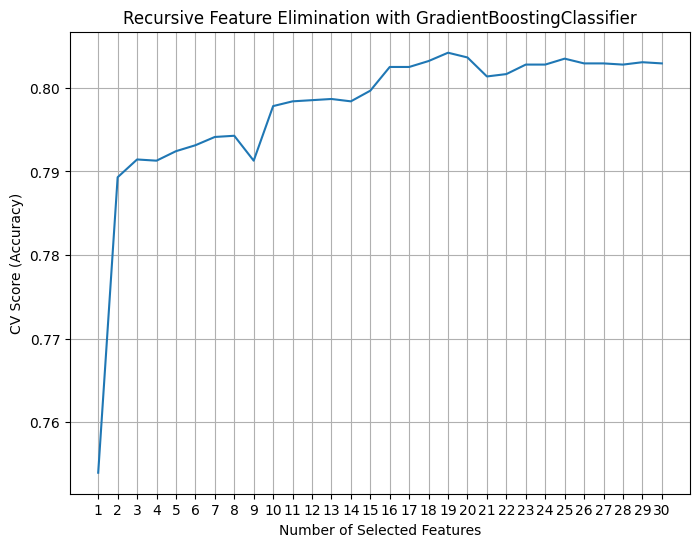

The optimal number of features: 19


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.grid()
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score (Accuracy)")
plt.title("Recursive Feature Elimination with GradientBoostingClassifier")
plt.show()
print("The optimal number of features: {}".format(rfecv.n_features_))

In [ ]:
#Storing the data with optimal features
X_rfe = X.iloc[:, rfecv.support_]

In [ ]:
# Splitting data with optimal features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)

In [ ]:
gbm_mpdel = modeling(GradientBoostingClassifier, "Gradient Boosting Classification")

Gradient Boosting Classification
accuracy: 0.8002839565
precision: 0.6421052632
f1_score: 0.7949131699


In [ ]:
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy: 0.7983909134
precision: 0.6414686825
f1_score: 0.7920566747


In [ ]:
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy: 0.7799337435
precision: 0.5966386555
f1_score: 0.7740971024


In [ ]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy: 0.6990061524
precision: 0.4616876819
f1_score: 0.7168862537


In [ ]:
gbm = GradientBoostingClassifier()

# Set up parameter grid
param_grid = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_grid, n_iter=100,
                                   scoring='accuracy', cv=5, random_state=50, n_jobs=-1)
random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

Best Parameters: {'learning_rate': 0.07789449894432092, 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 12, 'min_samples_split': 9, 'n_estimators': 113}
Best Accuracy Score: 0.9119999999999999
